In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
#data loading
df=pd.read_csv('Churn_Modelling.csv')
print('shape of dataset',df.shape)
df.head(2)

shape of dataset (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()
#our data is complete, no null value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.nunique()
#so customerID and surname is specific to customer, so we do not require them, similarly rownumber are not required
df.drop(columns=['RowNumber','Surname','CustomerId'],axis = 1,inplace = True)

In [7]:
features = df.keys()
features = features.drop('Exited')
#subsets = ['credit_score']
df.groupby('Exited')[features].mean()

#for exited members, average age is more
#exited members are more likely to be a non active member

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [8]:
df.groupby('Exited')[features].median()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,653.0,36.0,5.0,92072.68,2.0,1.0,1.0,99645.04
1,646.0,45.0,5.0,109349.29,1.0,1.0,0.0,102460.84


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited']


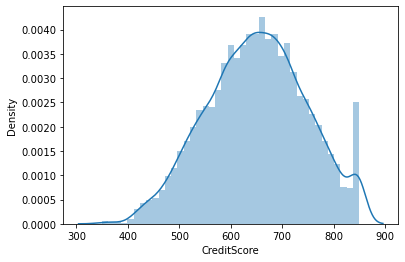

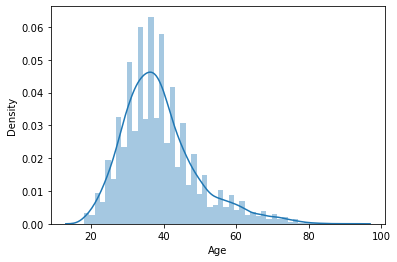

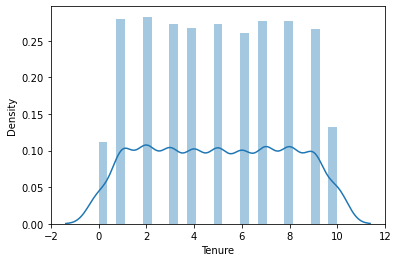

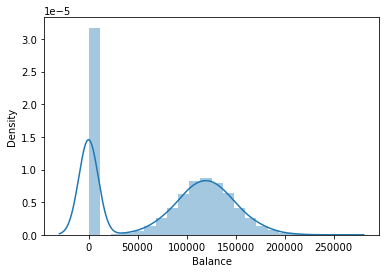

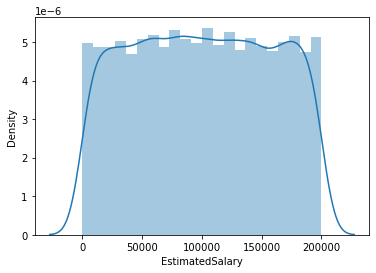

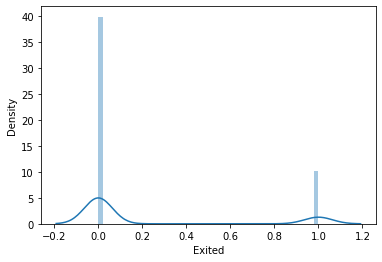

In [10]:
#univariate analysis, distribution of numerical columns
num_cols= list(df.select_dtypes(['int64', 'float64']).columns)
num_cols.remove('NumOfProducts')
num_cols.remove('HasCrCard')
num_cols.remove('IsActiveMember')

print(num_cols)
for c in num_cols:
    sns.distplot(df[c])
    plt.show()

# exited which is our target variable is baised 
# so we should balance class before modelling by upscaling

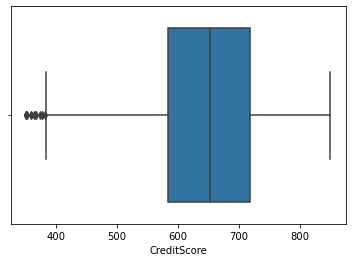

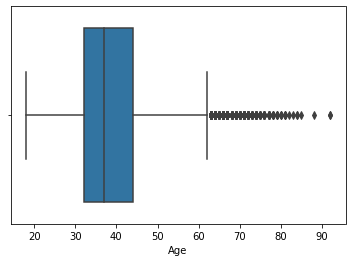

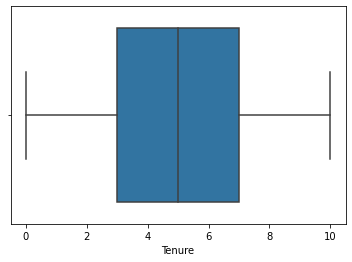

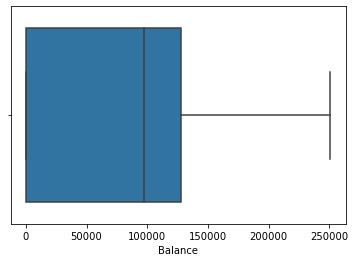

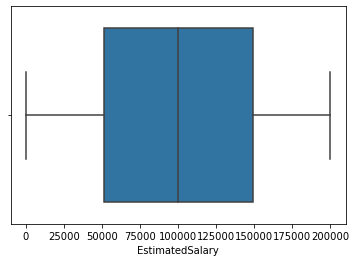

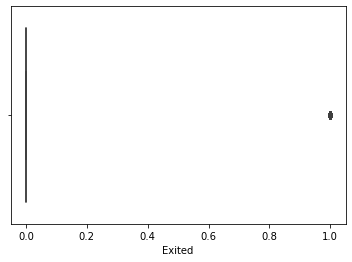

In [11]:
#checking for outliers
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

#credit score and age have outliners but thses values seems okay


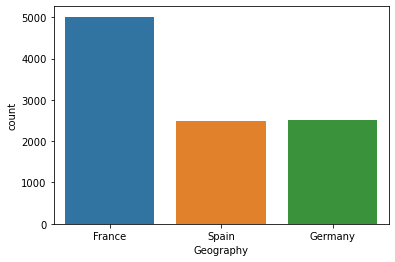

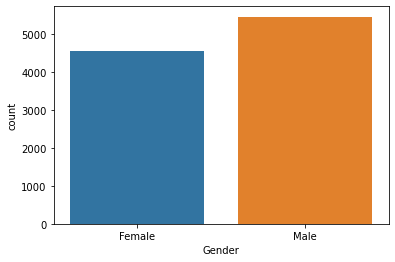

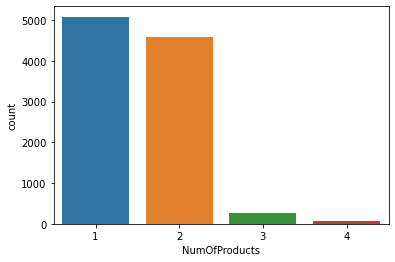

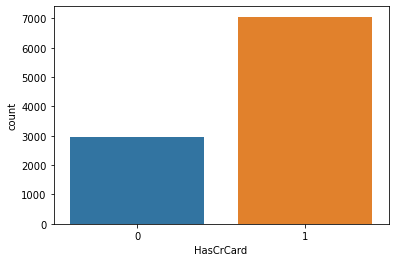

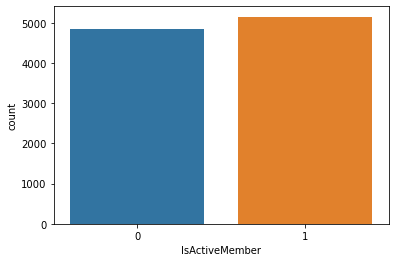

In [12]:
cat_col=['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
for i in cat_col:
    sns.countplot(df[i])
    plt.show()

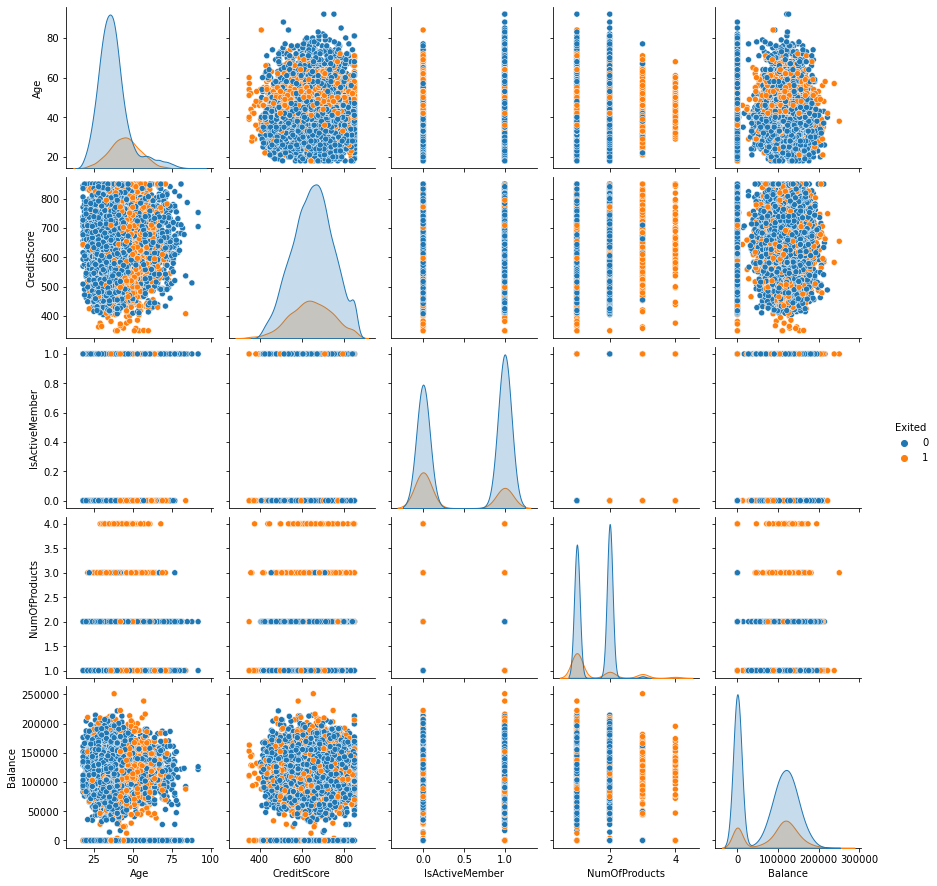

In [13]:
sns.pairplot(df,vars=['Age', 'CreditScore', 'IsActiveMember', 'NumOfProducts', 'Balance'], hue='Exited')
plt.show()

#mostly people with product 3,4 exited
#also people around age 50 exited

In [14]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


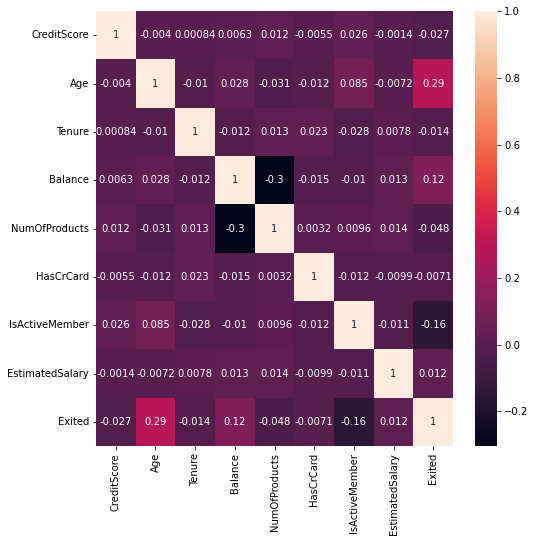

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(), annot=True)
plt.show()
#no strong correlation, no need to worry about non collinarity 

(array([ 142.,  469., 1030., 1149., 1819., 1810.,  984.,  887.,  568.,
         260.,  294.,  229.,  130.,   78.,   79.,   48.,   12.,    8.,
           2.,    2.]),
 array([18. , 21.7, 25.4, 29.1, 32.8, 36.5, 40.2, 43.9, 47.6, 51.3, 55. ,
        58.7, 62.4, 66.1, 69.8, 73.5, 77.2, 80.9, 84.6, 88.3, 92. ]),
 <BarContainer object of 20 artists>)

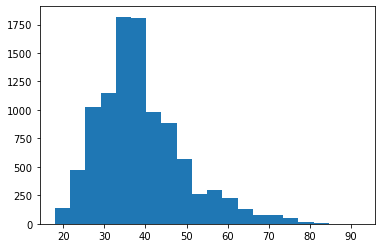

In [16]:
plt.hist(x=df['Age'],bins=20)
#we can assume that age is normally distributed

In [17]:
df.to_csv('afterEDA.csv')